## VGG16
VGG-16 is a convolutional neural network that is 16 layers deep. You can load a pre-trained version of the network trained on more than a million images from the ImageNet database. The pre-trained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals. As a result, the network has learned rich feature representations for a wide range of images. The network has an image input size of 224-by-224.



In [1]:
!pip install pandas
!pip install matplotlib
!pip install -U scikit-learn
!pip install pretty-confusion-matrix

     ---------------------------------------- 8.4/8.4 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
     -------------------------------------- 73.1/73.1 kB 998.5 kB/s eta 0:00:00
     -------------------------------------- 201.9/201.9 kB 3.1 MB/s eta 0:00:00
     -------------------------------------- 156.7/156.7 kB 3.1 MB/s eta 0:00:00
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 68.8/68.8 kB 1.9 MB/s eta 0:00:00
     --------------------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
autopep8 1.6.0 requires pycodestyle>=2.8.0, but you have pycodestyle 2.7.0 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import sklearn.metrics as metrics
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import VGG16

ModuleNotFoundError: No module named 'tensorflow'

##  Initialization

In [ ]:
num_classes = 3
IMAGE_SHAPE = [224, 224]
batch_size = 32 #change for better accuracy based on your dataset
epochs = 30 #change for better accuracy based on your dataset

## Load and Compile the VGG Model

In [ ]:
vgg = VGG16(input_shape = (224,224,3), weights = 'imagenet', include_top = False)
for layer in vgg.layers:
 layer.trainable = False
x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x) 
x = Dense(64, activation = 'relu')(x) 
x = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = vgg.input, outputs = x)
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])

## Image Data Generator
ImageDataGenerator class allows you to randomly rotate images through any degree between 0 and 360 by providing an integer value in the rotation_range argument.

In [13]:
pwd

'C:\\Users\\itBank-pc'

In [15]:
trdata = ImageDataGenerator()
train_data_gen = trdata.flow_from_directory(directory= "TRAIN",target_size=(224,224), shuffle=False, class_mode= 'categorical')
tsdata = ImageDataGenerator()
test_data_gen = tsdata.flow_from_directory(directory= "TEST", target_size=(224,224),shuffle=False, class_mode= 'categorical')

Found 925 images belonging to 3 classes.
Found 90 images belonging to 3 classes.


## Train the Model

In [ ]:
training_steps_per_epoch = np.ceil(train_data_gen.samples / batch_size)
validation_steps_per_epoch = np.ceil(test_data_gen.samples / batch_size)
#model.fit_generator(train_data_gen, steps_per_epoch = training_steps_per_epoch, validation_data=test_data_gen, validation_steps=validation_steps_per_epoch,epochs=epochs, verbose=1)
history = model.fit(train_data_gen, steps_per_epoch = training_steps_per_epoch, validation_data=test_data_gen, validation_steps=validation_steps_per_epoch,epochs=epochs, verbose=1)
print('Training Completed!')

## Accuracy

In [17]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
import sklearn.metrics as metrics
val_trues =test_data_gen.classes
from sklearn.metrics import classification_report
print(classification_report(val_trues, val_preds))

3/3 [==============================] - 62s 12s/step
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        30
           1       0.96      0.87      0.91        30
           2       0.91      0.70      0.79        30

    accuracy                           0.86        90
   macro avg       0.88      0.86      0.85        90
weighted avg       0.88      0.86      0.85        90



## Plot accuracy and loss

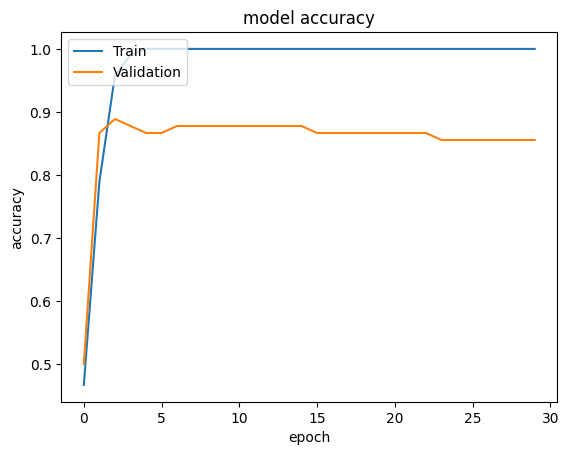

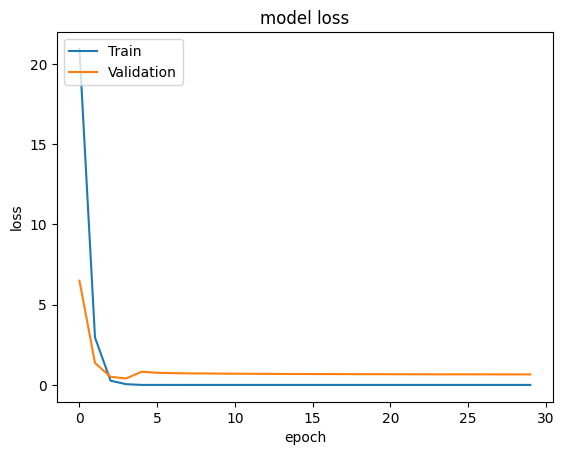

In [18]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Confusion Matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

3/3 [==============================] - 196s 20s/step


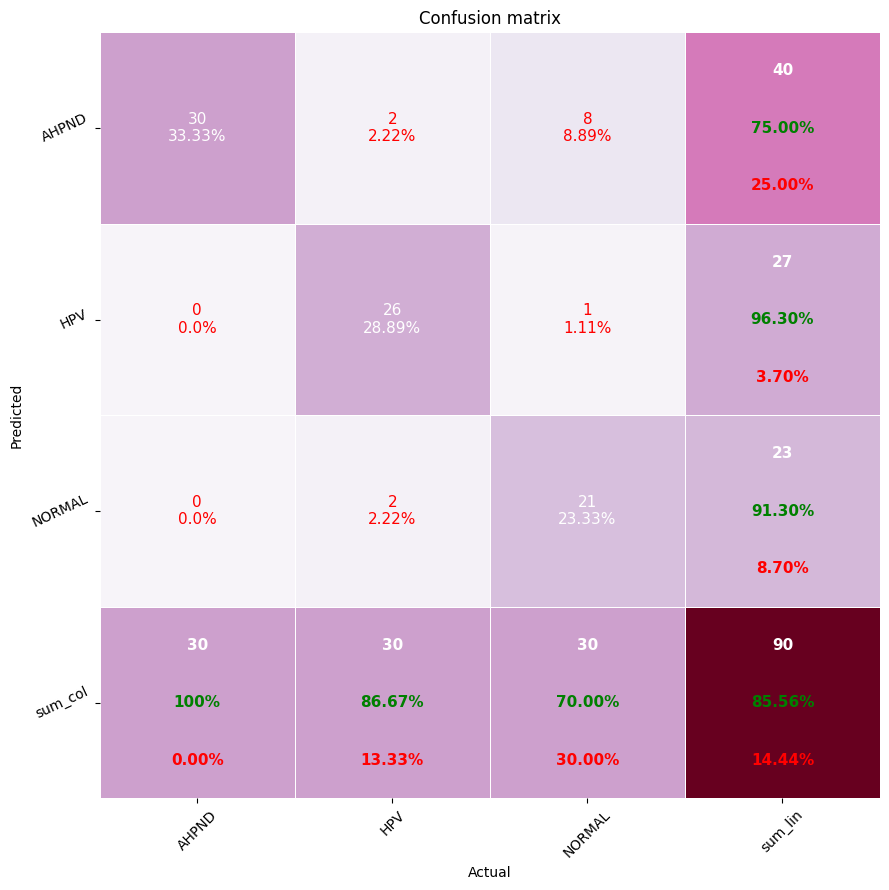

In [21]:
Y_pred = model.predict(test_data_gen, test_data_gen.samples / batch_size)
val_preds = np.argmax(Y_pred, axis=1)
val_trues = test_data_gen.classes
#cm = metrics.confusion_matrix(val_trues, val_preds)
#cm


from pretty_confusion_matrix import pp_matrix_from_data

cmap = 'PuRd'
pp_matrix_from_data(val_trues, val_preds, columns=["AHPND", "HPV", "NORMAL"],cmap=cmap)

## Save the Model

In [22]:
keras_file= "ModelVGG16.h5"
tf.keras.models.save_model(model,keras_file)

## Prediction using new image

In [4]:
pwd

'C:\\Users\\itBank-pc'

In [10]:
#create new file test.py and run this file
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
#load saved model
model = load_model("ModelVGG16.h5") 
#img_path = 'AHPND.v2_001.tif'
img_path = 'HPV_20X001.tif'
#img_path = 'Normal HP 20X001.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
preds = model.predict(x)
# create a list containing the class labels
class_labels = ['AHPND','HPV','Normal']
# find the index of the class with maximum score
pred = np.argmax(preds, axis=-1)
# print the label of the class with maximum score
print(class_labels[pred[0]])

ImportError: cannot import name 'builder' from 'google.protobuf.internal' (C:\Users\itBank-pc\.conda\envs\tensorflow\lib\site-packages\google\protobuf\internal\__init__.py)